1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

2. Investigate missing data and outliers.

3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [16]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

#import data
homeprices = pd.read_csv('trainprices.csv')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

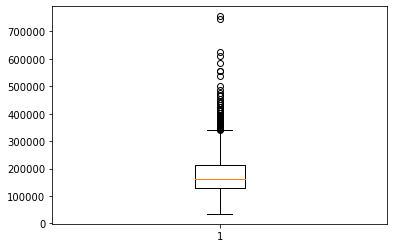

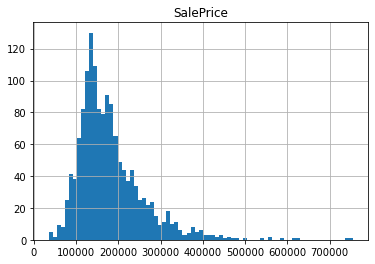

In [2]:
#Part 1: provide descriptive statistics and visualizations to help understand
#the marginal distribution of the dependent variable

print(homeprices['SalePrice'].describe())
plt.boxplot(homeprices['SalePrice'])
homeprices.hist(column='SalePrice', bins=75)

In [3]:
#Part 2: investigate missing data and outliers

#Identify columns with missing data
homeprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
hp1 = homeprices.drop_duplicates(keep='first')
print('Number of Records before duplicate drop:', len(homeprices))
print('Number of Records after duplicate drop:', len(hp1))
#missing values
hp2 = homeprices.dropna()
print('Number of Records before null value drop:', len(homeprices))
print('Number of Records after null value drop:', len(hp2))

Number of Records before duplicate drop: 1460
Number of Records after duplicate drop: 1460
Number of Records before null value drop: 1460
Number of Records after null value drop: 0


No duplicate records. All rows have at least one missing value. Sparse columns include: fireplace quality, pool quality, fence quality, miscelaneous feature, and alley.

In [5]:
# examine outliers
homeprices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#count outliers by variable
Q1 = homeprices.quantile(0.25)
Q3 = homeprices.quantile(0.75)
IQR = Q3 - Q1
outlier_count = pd.DataFrame(((homeprices < (Q1 - 1.5 * IQR)) | (homeprices > (Q3 + 1.5 * IQR))).sum())
outlier_count = outlier_count.sort_values(by=0, ascending=False)
outlier_count = outlier_count[outlier_count[0] > 0]
pd.DataFrame.transpose(outlier_count)

,EnclosedPorch,BsmtFinSF2,OverallCond,ScreenPorch,MSSubClass,MasVnrArea,LotFrontage,BsmtHalfBath,OpenPorchSF,LotArea,...,GarageArea,1stFlrSF,PoolArea,BsmtFinSF1,YearBuilt,Fireplaces,GarageCars,2ndFlrSF,OverallQual,BsmtFullBath
0,208,167,125,116,103,96,88,82,77,69,...,21,20,7,7,7,5,5,2,2,1


After investigating the variables with outliers, variable extreme values (min and max) seem reasonable given the information and context. There outliers did not identify any obvious miscoding of data. Many of the variables with flagged outliers are heavily right skewed by just a few data points because most observations have a zero value for that variable (e.g. Enclosed Porch Square Footage). This can be addressed later in the modeling process.

In [7]:
# Part 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
corr = homeprices.corr()
corr = corr[['SalePrice']]
corr = corr.sort_values(by='SalePrice', ascending=True)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SalePrice
KitchenAbvGr,-0.14
EnclosedPorch,-0.13
MSSubClass,-0.08
OverallCond,-0.08
YrSold,-0.03
LowQualFinSF,-0.03
Id,-0.02
MiscVal,-0.02
BsmtHalfBath,-0.02
BsmtFinSF2,-0.01


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

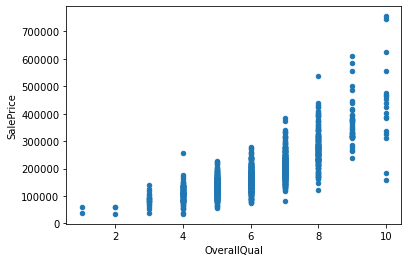

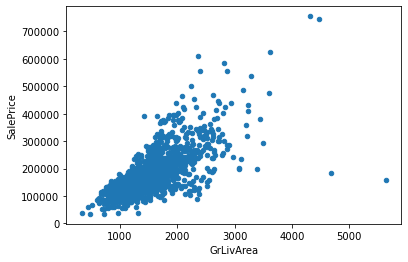

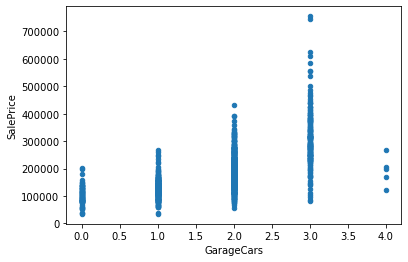

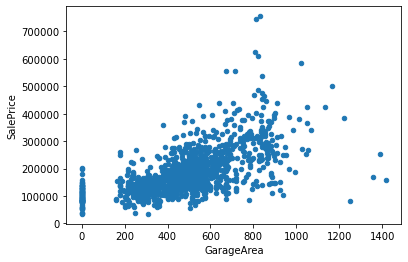

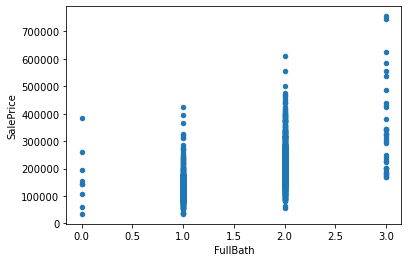

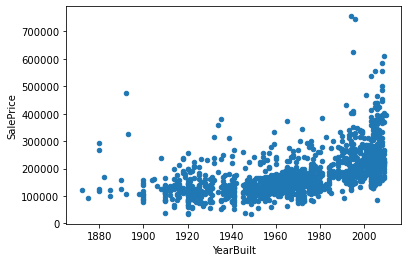

In [8]:
#Overall Home Quality
homeprices.plot.scatter('OverallQual', 'SalePrice')
#Above Ground Living Area in Square Feet
homeprices.plot.scatter('GrLivArea', 'SalePrice')
#Number of Cars Accomodated by Garage
homeprices.plot.scatter('GarageCars', 'SalePrice')
#Area of the Garage in Square Feet
homeprices.plot.scatter('GarageArea', 'SalePrice')
#Number of Full Baths
homeprices.plot.scatter('FullBath', 'SalePrice')
#Year Built
homeprices.plot.scatter('YearBuilt', 'SalePrice')

In [26]:
#Part 4: Engage in feature creation by splitting, merging, or otherwise generating a new predictor.
# Create a TotalBaths variable to reduce the dimensionality of the data.
# The correlation table shows the new variable is more correlated with SalePrice than any of the individual bathroom variables

homeprices['TotalBaths'] = homeprices['BsmtFullBath'] + .5 * homeprices['BsmtHalfBath'] + homeprices['FullBath'] + .5 * homeprices['HalfBath']
bathcorr = homeprices.loc[:, ['TotalBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice']].corr()
bathcorr.style.background_gradient(cmap='coolwarm').set_precision(3)

,TotalBaths,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
TotalBaths,1.000,0.583,0.012,0.694,0.394,0.632
BsmtFullBath,0.583,1.000,-0.148,-0.065,-0.031,0.227
BsmtHalfBath,0.012,-0.148,1.000,-0.055,-0.012,-0.017
FullBath,0.694,-0.065,-0.055,1.000,0.136,0.561
HalfBath,0.394,-0.031,-0.012,0.136,1.000,0.284
SalePrice,0.632,0.227,-0.017,0.561,0.284,1.000


In [43]:
#Part 5: Using the dependent variable, perform both min-max and standard scaling in Python.
dependent = homeprices[['SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mmscaled = scaler.fit_transform(dependent)

from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
stscaled = stscaler.fit_transform(dependent)

[[0.24107763]
 [0.20358284]
 [0.26190807]
 ...
 [0.321622  ]
 [0.14890293]
 [0.15636717]]
[[ 0.34727322]
 [ 0.00728832]
 [ 0.53615372]
 ...
 [ 1.07761115]
 [-0.48852299]
 [-0.42084081]]
